In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# Load data
tsla = pd.read_csv('../data/TSLA_historical.csv', parse_dates=True)
bnd = pd.read_csv('../data/BND_historical.csv', parse_dates=True)
spy = pd.read_csv('../data/SPY_historical.csv', parse_dates=True)

# Basic stats
print(tsla.describe())
print(bnd.describe())
print(spy.describe())

# Check data types and missing values
print(tsla.info())
# Handle missing values (e.g., forward fill)
tsla = tsla.ffill()
bnd = bnd.ffill()
spy = spy.ffill()

# Ensure no missing dates (reindex to business days if needed)
date_range = pd.date_range(start=tsla.index.min(), end=tsla.index.max(), freq='B')
tsla = tsla.reindex(date_range).ffill()
# Repeat for bnd and spy

         Price           Adj Close               Close               High  \
count     2537                2536                2536               2536   
unique    2537                2483                2483               2429   
top     Ticker  23.976667404174805  23.976667404174805  20.53333282470703   
freq         1                   2                   2                  3   

                       Low  Open     Volume  
count                 2536  2536       2536  
unique                2448  2430       2526  
top     18.700000762939453  24.0  103416000  
freq                     3     4          2  
         Price          Adj Close              Close               High  \
count     2537               2536               2536               2536   
unique    2537               2312               1268               1260   
top     Ticker  76.36157989501953  81.55000305175781  81.97000122070312   
freq         1                  5                  9                 10   

        

C:\Users\girma\AppData\Local\Temp\ipykernel_25968\862298192.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tsla = tsla.reindex(date_range).ffill()


In [ ]:
plt.figure(figsize=(12,6))
plt.plot(tsla['Adj Close'], label='TSLA')
plt.plot(bnd['Adj Close'], label='BND')
plt.plot(spy['Adj Close'], label='SPY')
plt.title('Adjusted Closing Prices')
plt.legend()
plt.show()

c:\profileOptimization\TimeSeries-Portfolio-Optimization\notebooks


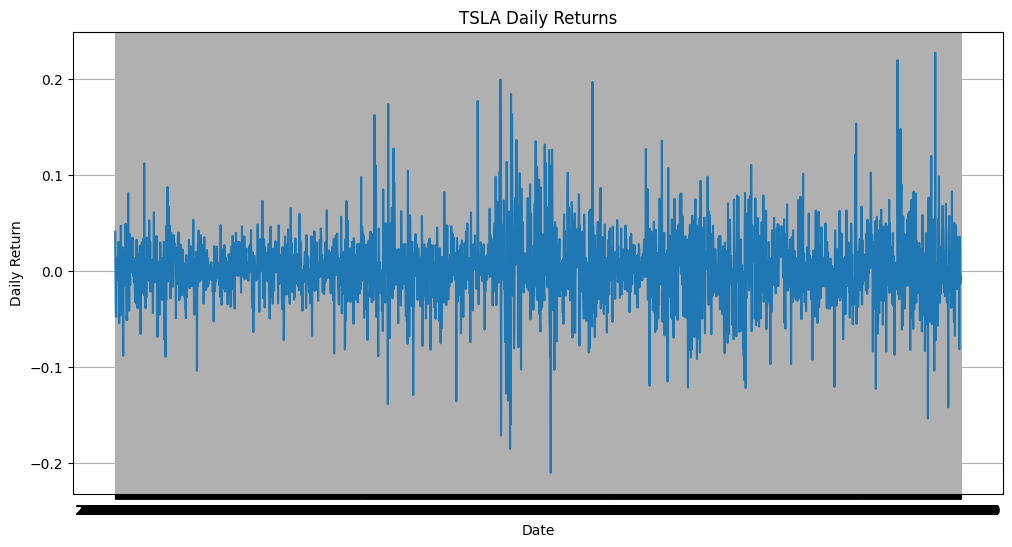

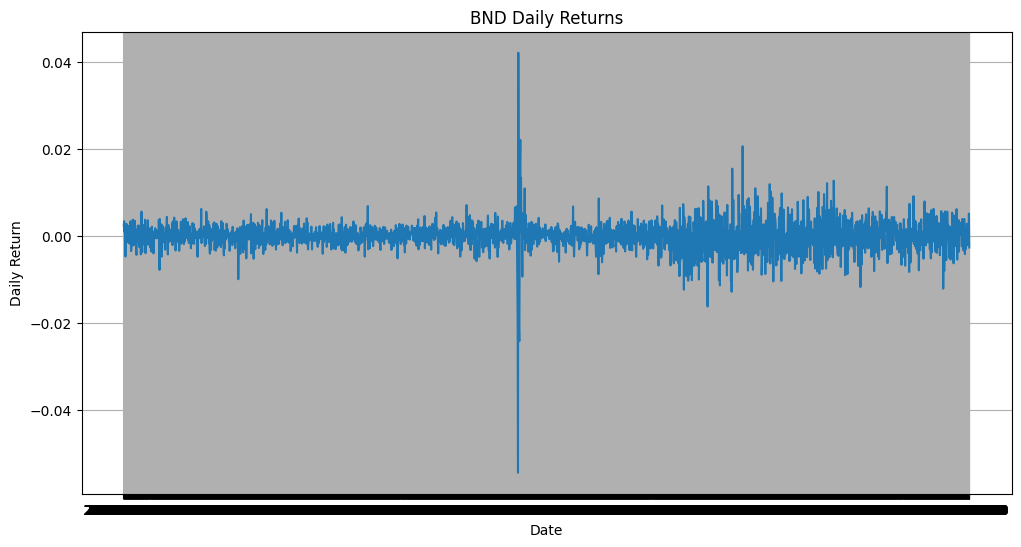

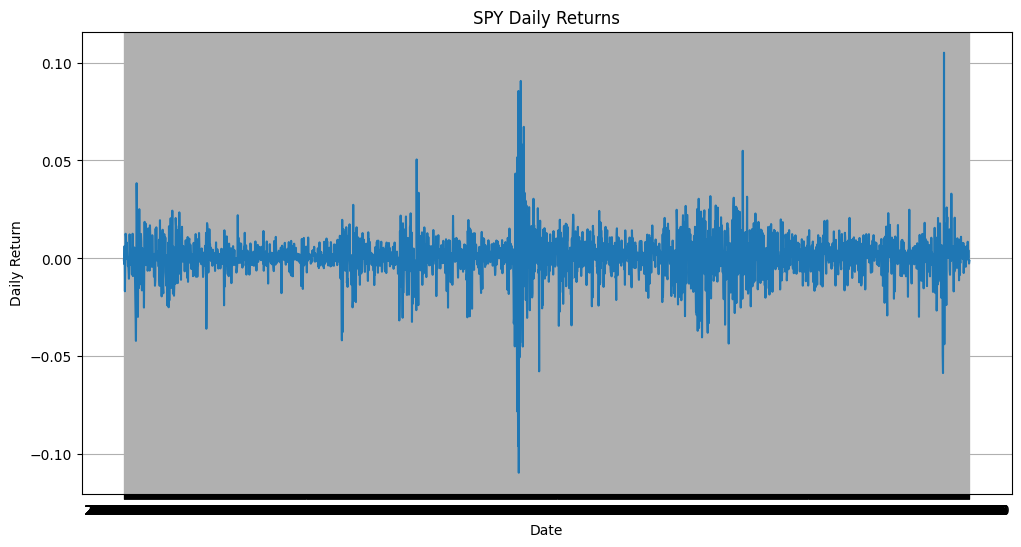

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (assuming your CSV files now contain the 'Adj Close' column)
tsla = pd.read_csv('../data/TSLA_historical.csv', parse_dates=True)
bnd = pd.read_csv('../data/BND_historical.csv', parse_dates=True)
spy = pd.read_csv('../data/SPY_historical.csv', parse_dates=True)

# Set the first column (Date) as the index
tsla.set_index(tsla.columns[0], inplace=True)
bnd.set_index(bnd.columns[0], inplace=True)
spy.set_index(spy.columns[0], inplace=True)

# Explicitly convert 'Adj Close' to numeric type to prevent 'str' errors
for df in [tsla, bnd, spy]:
    if 'Adj Close' in df.columns:
        df['Adj Close'] = pd.to_numeric(df['Adj Close'], errors='coerce')

# Drop any rows that may have resulted in NaN from the coercion
tsla.dropna(subset=['Adj Close'], inplace=True)
bnd.dropna(subset=['Adj Close'], inplace=True)
spy.dropna(subset=['Adj Close'], inplace=True)

# Calculate Daily Returns
tsla['Daily Return'] = tsla['Adj Close'].pct_change()
bnd['Daily Return'] = bnd['Adj Close'].pct_change()
spy['Daily Return'] = spy['Adj Close'].pct_change()

# Plot and save Daily Returns for TSLA
plt.figure(figsize=(12,6))
plt.plot(tsla['Daily Return'])
plt.title('TSLA Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.savefig('../reports/TSLA_Daily_Returns.png') # Save plot to reports folder
plt.show()

# Plot and save Daily Returns for BND
plt.figure(figsize=(12,6))
plt.plot(bnd['Daily Return'])
plt.title('BND Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.savefig('../reports/BND_Daily_Returns.png') # Save plot to reports folder
plt.show()

# Plot and save Daily Returns for SPY
plt.figure(figsize=(12,6))
plt.plot(spy['Daily Return'])
plt.title('SPY Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.savefig('../reports/SPY_Daily_Returns.png') # Save plot to reports folder
plt.show()

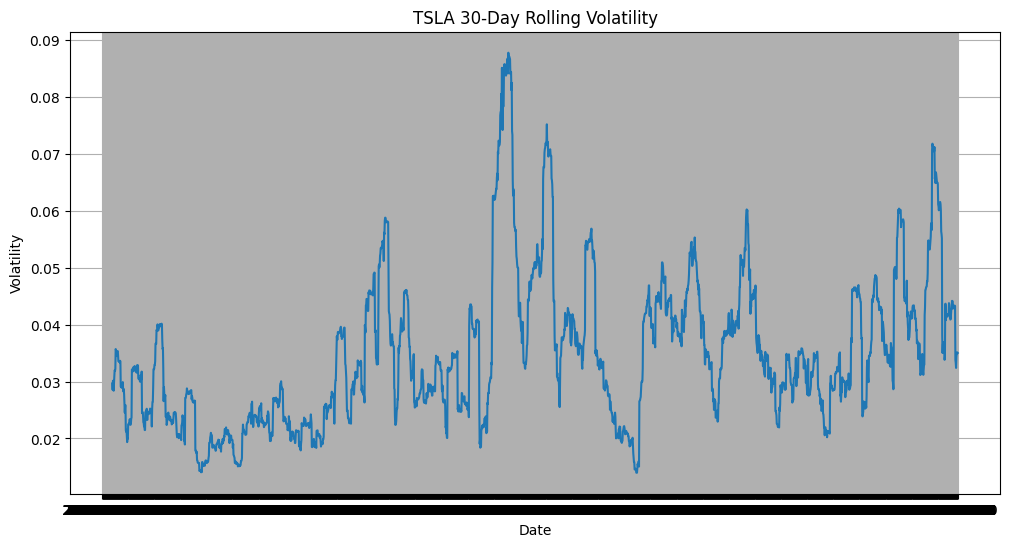

In [11]:
tsla['Rolling Vol'] = tsla['Daily Return'].rolling(window=30).std()

plt.figure(figsize=(12,6))
plt.plot(tsla['Rolling Vol'])
plt.title('TSLA 30-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.savefig('../reports/TSLA_Rolling_Volatility.png') # Save the plot
plt.show()

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import sys

# ... (Previous code to load and clean data goes here) ...

# Run ADF test on 'Adj Close' and save to a text file
with open('../reports/adfuller_results.txt', 'w') as f:
    # Temporarily redirect standard output to the file
    original_stdout = sys.stdout
    sys.stdout = f

    print("--- ADF Test Results for TSLA ---")
    result = adfuller(tsla['Adj Close'].dropna())
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('---' * 10)
    
    # Test on daily returns
    result_returns = adfuller(tsla['Daily Return'].dropna())
    print('ADF on Returns:', result_returns)
    print('---' * 10)

    # You can add the same tests for BND and SPY here if you want
    print("\n--- ADF Test Results for BND ---")
    result_bnd = adfuller(bnd['Adj Close'].dropna())
    print('ADF Statistic:', result_bnd[0])
    print('p-value:', result_bnd[1])
    print('---' * 10)
    
    # Test on daily returns for BND
    result_bnd_returns = adfuller(bnd['Daily Return'].dropna())
    print('ADF on Returns:', result_bnd_returns)
    print('---' * 10)

    print("\n--- ADF Test Results for SPY ---")
    result_spy = adfuller(spy['Adj Close'].dropna())
    print('ADF Statistic:', result_spy[0])
    print('p-value:', result_spy[1])
    print('---' * 10)
    
    # Test on daily returns for SPY
    result_spy_returns = adfuller(spy['Daily Return'].dropna())
    print('ADF on Returns:', result_spy_returns)
    print('---' * 10)
    
    # Restore standard output
    sys.stdout = original_stdout

print("ADF test results saved to reports/adfuller_results.txt")

ADF test results saved to reports/adfuller_results.txt
